#Предобработка данных

In [ ]:
import pandas as pd

##**Обрабатываем датасет для регрессии**

In [ ]:
data_reg_xlsx = pd.read_excel('real_estate_valuation.xlsx')
data_reg_xlsx.to_csv('real_estate_valuation.csv', encoding='utf-8',index=False)
data_reg = pd.read_csv('real_estate_valuation.csv')
data_reg.head()

Nomber  X1 transaction date  ...  X6 longitude  Y house price of unit area
0       1          2012.916667  ...     121.54024                        37.9
1       2          2012.916667  ...     121.53951                        42.2
2       3          2013.583333  ...     121.54391                        47.3
3       4          2013.500000  ...     121.54391                        54.8
4       5          2012.833333  ...     121.54245                        43.1

[5 rows x 8 columns]

In [ ]:
data_reg.columns

Index(['Nomber', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [ ]:
data_reg = data_reg.rename(columns={'X1 transaction date': 'Transaction date',
                                    'X2 house age': 'House age',
                                    'X3 distance to the nearest MRT station': 'Distance to the nearest MRT station',
                                    'X4 number of convenience stores': 'Number of convenience stores',
                                    'X5 latitude': 'Latitude',
                                    'X6 longitude': 'Longitude',
                                    'Y house price of unit area': 'House price of unit area'})
data_reg

Nomber  Transaction date  ...  Longitude  House price of unit area
0         1       2012.916667  ...  121.54024                      37.9
1         2       2012.916667  ...  121.53951                      42.2
2         3       2013.583333  ...  121.54391                      47.3
3         4       2013.500000  ...  121.54391                      54.8
4         5       2012.833333  ...  121.54245                      43.1
..      ...               ...  ...        ...                       ...
409     410       2013.000000  ...  121.50381                      15.4
410     411       2012.666667  ...  121.54310                      50.0
411     412       2013.250000  ...  121.53986                      40.6
412     413       2013.000000  ...  121.54067                      52.5
413     414       2013.500000  ...  121.54310                      63.9

[414 rows x 8 columns]

In [ ]:
data_reg.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Nomber                               414 non-null    int64  
 1   Transaction date                     414 non-null    float64
 2   House age                            414 non-null    float64
 3   Distance to the nearest MRT station  414 non-null    float64
 4   Number of convenience stores         414 non-null    int64  
 5   Latitude                             414 non-null    float64
 6   Longitude                            414 non-null    float64
 7   House price of unit area             414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


Перекодировка не нужна, потому что кодировка признаков корректна

Видим, что нет ячеек без данных, но для наглядности посмотрим isnull()

In [ ]:
data_reg.isnull().sum()

Nomber                                 0
Transaction date                       0
House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64

In [ ]:
data_reg.to_csv('real_estate_valuation_preprocessed.csv',index=False)

##**Обрабатываем датасет для классификации**

In [ ]:
data_clas = pd.read_csv('contraceptive_method_choice.data')

In [ ]:
data_clas.head()

Wife's age  Wife's education  ...  Media exposure  Contraceptive method used
0          24                 2  ...               0                          1
1          45                 1  ...               0                          1
2          43                 2  ...               0                          1
3          42                 3  ...               0                          1
4          36                 3  ...               0                          1

[5 rows x 10 columns]

In [ ]:
data_clas.isnull().sum()

Wife's age                      0
Wife's education                0
Husband's education             0
Number of children ever born    0
Wife's religion                 0
Wife's now working?             0
Husband's occupation            0
Standard-of-living index        0
Media exposure                  0
Contraceptive method used       0
dtype: int64

In [ ]:
data_clas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Wife's age                    1473 non-null   int64
 1   Wife's education              1473 non-null   int64
 2   Husband's education           1473 non-null   int64
 3   Number of children ever born  1473 non-null   int64
 4   Wife's religion               1473 non-null   int64
 5   Wife's now working?           1473 non-null   int64
 6   Husband's occupation          1473 non-null   int64
 7   Standard-of-living index      1473 non-null   int64
 8   Media exposure                1473 non-null   int64
 9   Contraceptive method used     1473 non-null   int64
dtypes: int64(10)
memory usage: 115.2 KB


Видим, что перекодировка не требуется, как же как и заполнение пропусков, т.к. их нет.

In [ ]:
data_clas.to_csv('contraceptive_method_choice_preprocessed.csv', 
                 encoding='utf-8',index=False)

#Визуализация

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

##Датасет для регрессии

In [2]:
data_reg = pd.read_csv('real_estate_valuation_preprocessed.csv')

In [ ]:
data_reg.tail()

Nomber  Transaction date  ...  Longitude  House price of unit area
409     410       2013.000000  ...  121.50381                      15.4
410     411       2012.666667  ...  121.54310                      50.0
411     412       2013.250000  ...  121.53986                      40.6
412     413       2013.000000  ...  121.54067                      52.5
413     414       2013.500000  ...  121.54310                      63.9

[5 rows x 8 columns]

In [ ]:
data_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Nomber                               414 non-null    int64  
 1   Transaction date                     414 non-null    float64
 2   House age                            414 non-null    float64
 3   Distance to the nearest MRT station  414 non-null    float64
 4   Number of convenience stores         414 non-null    int64  
 5   Latitude                             414 non-null    float64
 6   Longitude                            414 non-null    float64
 7   House price of unit area             414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [ ]:
print(data_reg.shape)

(414, 8)


In [ ]:
data = data_reg.groupby('House age')['House price of unit area']

In [ ]:
data.mean()

House age
0.0     54.135294
1.0     50.700000
1.1     49.780000
1.5     48.700000
1.7     50.400000
          ...    
40.9    54.350000
41.3    47.900000
41.4    63.300000
42.7    35.300000
43.8    42.700000
Name: House price of unit area, Length: 236, dtype: float64

Посмотрим, как выглядит график зависимости стоимости от возраста дома

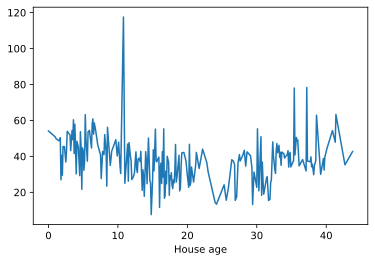

In [ ]:
data.mean().plot()

Видим, что зависимости, которую было логично предположить - падение цены дома с возрастом - не наблюдается

In [ ]:
data = data_reg.groupby('Distance to the nearest MRT station')['House price of unit area'].mean()
data

Distance to the nearest MRT station
23.38284      48.700000
49.66105      57.300000
56.47425      56.666667
57.58945      42.700000
82.88643      46.600000
                ...    
4605.74900    13.400000
5512.03800    18.100000
6306.15300    15.000000
6396.28300    12.200000
6488.02100    11.200000
Name: House price of unit area, Length: 259, dtype: float64

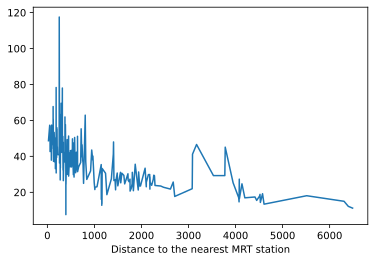

In [ ]:
data.plot()

На графике можно наблюдать здравую закономерность - чем больше расстояние до метро, тем меньше стоимость. 
Дома рядом с метро стоят дороже.

In [ ]:
data = data_reg.groupby('Number of convenience stores')['House price of unit area'].mean()
data

Number of convenience stores
0     26.462687
1     31.839130
2     31.412500
3     29.536957
4     37.474194
5     44.729851
6     46.951351
7     43.848387
8     44.696667
9     51.732000
10    48.430000
Name: House price of unit area, dtype: float64

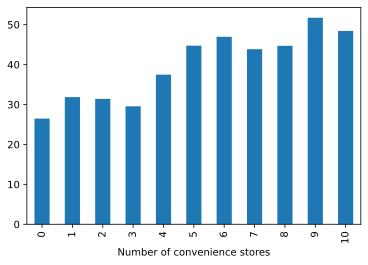

In [ ]:
data.plot(kind='bar') #логично сделать бар на категориальный признак

График поддтверждает ожидания, что увеличение количества круглосуточных магазинов способствует увеличению цены. 
Больше круглосуточных - цена выше, ближе к метро - ещё выше. А с возрастом дома пока не было ясности - чёткая закономерность, которую можно увидеть по графику, не прослеживается.

In [ ]:
data = data_reg.groupby('Latitude')['House price of unit area'].mean()
data

Latitude
24.93207    29.300000
24.93293    45.100000
24.93363    29.300000
24.93885    16.933333
24.94155    16.457143
              ...    
24.99156    33.250000
24.99176    35.400000
24.99800    41.200000
25.00115    46.600000
25.01459    27.300000
Name: House price of unit area, Length: 234, dtype: float64

In [ ]:
data.plot(rot=45)

In [ ]:
data = data_reg.groupby('Longitude')['House price of unit area'].mean()
data

Longitude
121.47353    11.20
121.47516    15.00
121.47883    12.20
121.48458    18.10
121.49507    19.20
             ...  
121.55391    30.60
121.55481    23.50
121.55964    23.50
121.56174    21.80
121.56627    23.35
Name: House price of unit area, Length: 232, dtype: float64

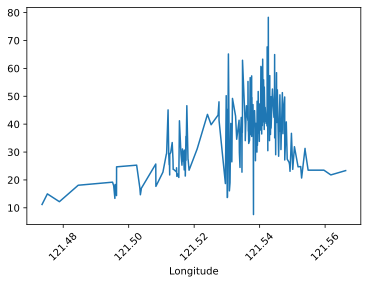

In [ ]:
data.plot(rot=45)

Конкретных выводов по широте и долготе сделать нельзя. На это есть, по крайней мере, две причины (которые я вижу)
1. Диапозон величин невелик
2. Ничего конкретного по графику пока сказать нельзя.
(Можно предположить, что цена возрастает при приближении к долготе 121.54)
Теперь немного обобщим графики, посмотрим зависимости "всех от всех", их распределения:

In [4]:
sns.pairplot(data_reg.drop(['Nomber'],axis=1))

Output hidden; open in https://colab.research.google.com to view.

Больше всего домо в районе 18 лет. Много домов находятся довольно близко к станции метро, большинство домов расположине на долготе 121.53-121.54.
Видим, что около 43 распределение цены подскочило, интересно посмотреть подробнее. На остальных графиках ничего нового, что бы мы ещё не видели, я не наблюдаю.

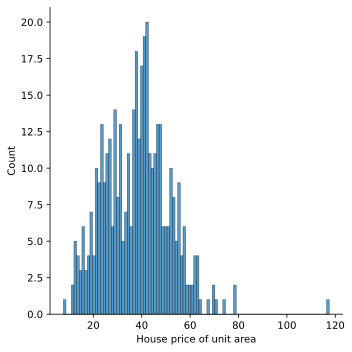

In [ ]:
sns.displot(data_reg['House price of unit area'],bins=100)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


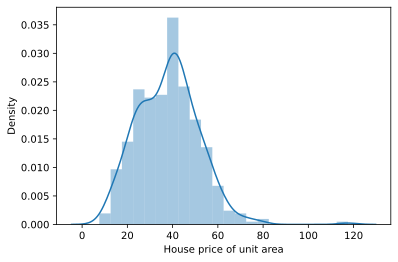

In [ ]:
sns.distplot(data_reg['House price of unit area'])

Видим, что есть выбросs, цена которых около 117, и что наибольшее количество домов с ценой около 45.
Немного поиграем с бинами у возраста домов, чтобы увидеть картину лучше.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


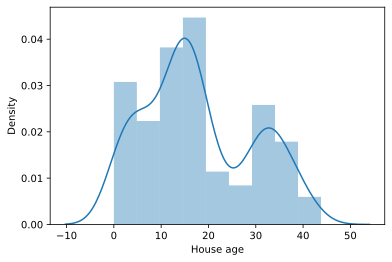

In [ ]:
sns.distplot(data_reg['House age'])

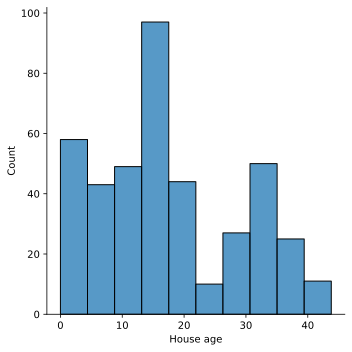

In [ ]:
sns.displot(data_reg['House age'], bins=10)

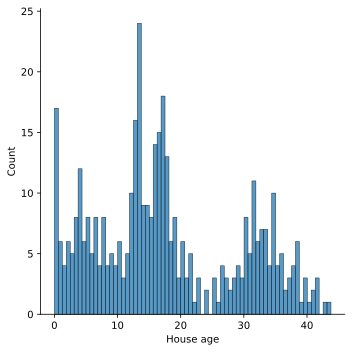

In [ ]:
sns.displot(data_reg['House age'], bins=70)

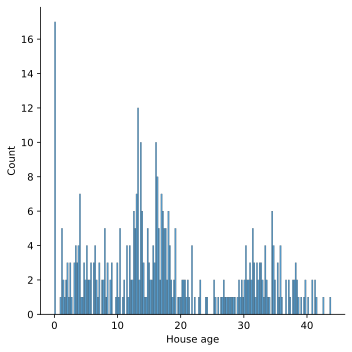

In [ ]:
sns.displot(data_reg['House age'], bins=200)

Видим интересную ситуацию, которую мы бы не увидели на малых бинах. У нас количество новых домов больше всего, если сравнивать достаточно малые промежутки в возрасте. Но если разделять на промежутки больше, то становится ясно, где сосредоточена цена основного количества домов - между 10 и 20.

In [ ]:
sns.jointplot(y=data_reg['House age'], x=data_reg['House price of unit area'])

С помощью данной визуализации хорошо видно плотность сосредоточения. Наибольшая плотность на пересечении цены 40 и возраста от 12 до 18

Думаю, будет интересно посмотреть ещё такую виpуализацию, но только с Distance to the nearest MRT station

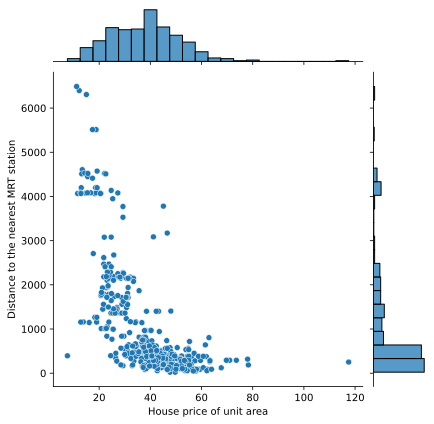

In [ ]:
sns.jointplot(y=data_reg['Distance to the nearest MRT station'], x=data_reg['House price of unit area'])

Как мы и видели раньше, концентрация находится на пересечении цены около 45 и дистанцией до метро не более 800 (примерно). 
Можно увидеть это более наглядно через кайнд хекс

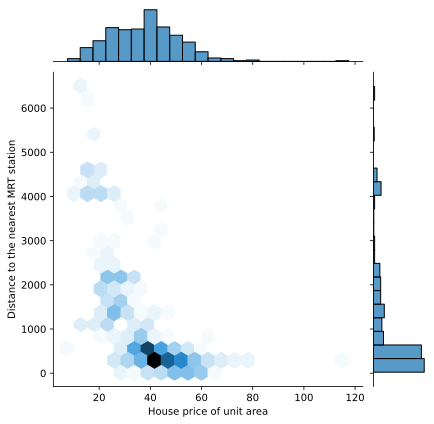

In [ ]:
sns.jointplot(y=data_reg['Distance to the nearest MRT station'], x=data_reg['House price of unit area'],kind='hex')

Рассмотрим "коробки с усами для этих же признаков"

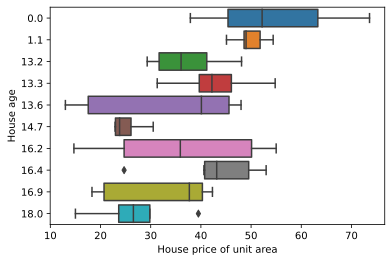

In [ ]:
top_ages = data_reg['House age'].value_counts().sort_values(ascending = False).head(10).index.values
sns.boxplot(y="House age", x="House price of unit area", data=data_reg[data_reg['House age'].isin(top_ages)], orient="h")

Отсюда можем понаблюдать, как ведёт себя цена на разных возрастах. Но всё же.. от сюда ничего "необычного" не узнаём. На новых домах цена склоняется к 50-53 (относительно медианы), но вообще она сосредотачивается от 64 до 45 (примерно). Выбрасов не наблюдается.
Похожие выводы можно сделать относительно каждой из 10 коробок. Стоит отметить лишь коробки, где нет одного уса и коробки с выбросами.
Но! Всё равно, самые новые дома с возрастом ноль стоят дороже всего, дальше цена никак не зависит от возраста, она может быть и больше, и меньше на разных возрастах.

In [ ]:
top_dist = data_reg['Distance to the nearest MRT station'].value_counts().sort_values(ascending = False).head(10).index.values
sns.boxplot(y="Distance to the nearest MRT station", x="House price of unit area", data=data_reg[data_reg['Distance to the nearest MRT station'].isin(top_dist)], orient="h")

Видим всё ту же логическую закономерность: с увеличением дистанции цена падает. Из этих коробок мы лишь подробнее можем рассмотреть 10 "основных" соотношений между дистанцией до ближайшего метро и ценой. Так же видим, что наблюдаются выбросы у двух коробок. (Их нужно принять во внимание, потому что они потом могут помешать строить модель, т.к. она будет на них "отвлекаться")

In [ ]:
import numpy as np

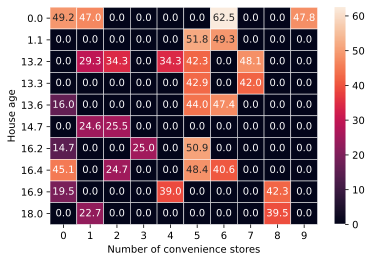

In [ ]:
platform_genre_sales = data_reg[data_reg['House age'].isin(top_ages)].pivot_table(
                        index='House age', 
                        columns='Number of convenience stores', 
                        values='House price of unit area', 
                        aggfunc=np.mean).fillna(0).applymap(float)
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=.5)

Наибольшая средняя цена находится на пересечении новых домов и 6 круглосуточных магизинов. 
Но стоит заметить ячейку на пересечении новыхо домов и 0 магазинов. Несмотря на отсутствие круглосуточных магазинов, цена довольно велика. Ну и логическая закономерность, нижний левый угол - угол наименьшей средней цены.

##Датасет для классификации

In [5]:
data_clas = pd.read_csv('contraceptive_method_choice_preprocessed.csv')

In [ ]:
data_clas.head()

Wife's age  Wife's education  ...  Media exposure  Contraceptive method used
0          24                 2  ...               0                          1
1          45                 1  ...               0                          1
2          43                 2  ...               0                          1
3          42                 3  ...               0                          1
4          36                 3  ...               0                          1

[5 rows x 10 columns]

In [ ]:
data_clas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Wife's age                    1473 non-null   int64
 1   Wife's education              1473 non-null   int64
 2   Husband's education           1473 non-null   int64
 3   Number of children ever born  1473 non-null   int64
 4   Wife's religion               1473 non-null   int64
 5   Wife's now working?           1473 non-null   int64
 6   Husband's occupation          1473 non-null   int64
 7   Standard-of-living index      1473 non-null   int64
 8   Media exposure                1473 non-null   int64
 9   Contraceptive method used     1473 non-null   int64
dtypes: int64(10)
memory usage: 115.2 KB


In [ ]:
print(data_clas.shape)

(1473, 10)


In [ ]:
data = data_clas.groupby('Contraceptive method used')['''Wife's age'''].mean()
data

Contraceptive method used
1    33.424483
2    34.384384
3    30.244618
Name: Wife's age, dtype: float64

In [ ]:
data.plot(kind='bar')

Из столбчатой диаграмы видим средний возраст, который использует каждый из видов контрацепции. Посмотрим на минимальный возраст.

In [ ]:
data = data_clas.groupby('Contraceptive method used')['''Wife's age'''].min()
data

Contraceptive method used
1    16
2    17
3    16
Name: Wife's age, dtype: int64

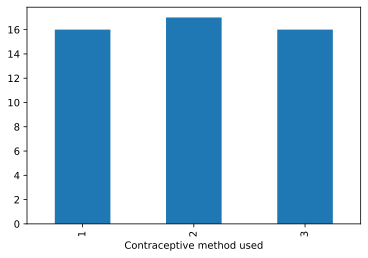

In [ ]:
data.plot(kind='bar')

И стоит посмотреть на количественное распределение по методам контрацепсии.

In [ ]:
data = data_clas.groupby('Contraceptive method used')['''Wife's age'''].count()
data

Contraceptive method used
1    629
2    333
3    511
Name: Wife's age, dtype: int64

In [ ]:
data.plot(kind='bar')

Методы по популярности располагаются так: 1,3,2. Причём, первый метод в два раза популярнее второго и в 1,2 раза популярнее третьего.

In [ ]:
data = data_clas.groupby('Contraceptive method used')['Number of children ever born'].mean()
data

Contraceptive method used
1    2.934817
2    3.738739
3    3.352250
Name: Number of children ever born, dtype: float64

In [ ]:
data = data_clas.groupby('Contraceptive method used')['Number of children ever born'].max()
data

Contraceptive method used
1    12
2    13
3    16
Name: Number of children ever born, dtype: int64

In [ ]:
data = data_clas.groupby('Contraceptive method used')['Number of children ever born'].min()
data

Contraceptive method used
1    0
2    1
3    0
Name: Number of children ever born, dtype: int64

Тут нет смысла строить графики, и так можно всё увидеть. Среднее количество детей почти не отличается у разных видов контрацепции, только лишь разница небольшая видна между первым и вторым: у первого в среднем почти 3, а у второго почти 4. 
Так же интересно видеть, что максимальное количество детей при 1 и 2 методах совпадают, а при 3 выше. (но вряд ли из этого можно делать выводы)

In [ ]:
sns.pairplot(data_clas)

Output hidden; open in https://colab.research.google.com to view.

Из всех этих графиков самые полезные те, что находятся на диагонали. На их основании мы можем некоторые выводы о распределении. Например: у большинства мужчин и у большинства женщин высшие образования.  Большинство женщин принимают ислам. Большинство имеют высокий уровень жизни. 
Рассмотрим некоторые подробнее.

In [ ]:
sns.displot(data_clas['Number of children ever born'],bins=20)

Как и предполагалось раньше - 16 детей это всего лишь выброс. 



/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


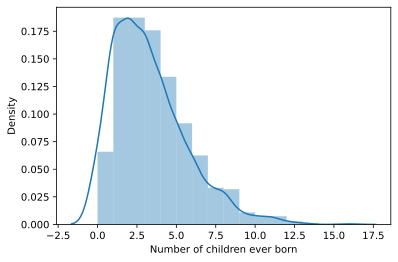

In [ ]:
sns.distplot(data_clas['Number of children ever born'], bins=16)

In [9]:
print(data_clas[data_clas['Number of children ever born']>7]['Number of children ever born'].count(),
      data_clas[data_clas['Number of children ever born']>8]['Number of children ever born'].count(),
      data_clas[data_clas['Number of children ever born']>9]['Number of children ever born'].count())


92 45 29


Всего объектов наблюдений 1473. Но! Детей больше 8 имеют 45 объектов. Это всего 1.9% . Можно будет не учитывать данные объекты при построениях моделей и считать их за выбросы.

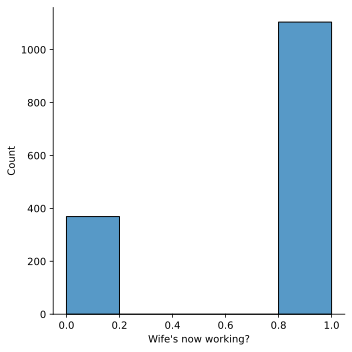

In [ ]:
sns.displot(data_clas['''Wife's now working?'''],bins=5)

Большая часть жён работают.


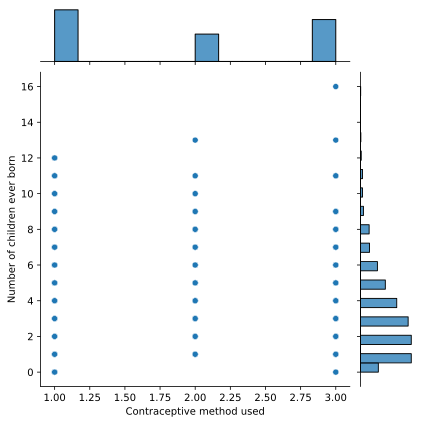

In [ ]:
sns.jointplot(y=data_clas['Number of children ever born'], x=data_clas['Contraceptive method used'])

Благодаря столбчатым диаграмам мы можем понимать, где концентрация выше, но наглядно ничего не понятно, поэтому воспользуемся kind='hex'

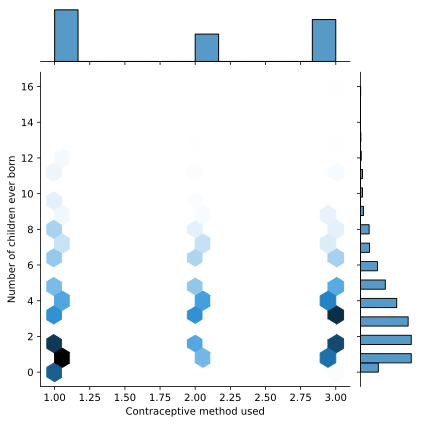

In [ ]:
sns.jointplot(y=data_clas['Number of children ever born'], x=data_clas['Contraceptive method used'],kind='hex')

Теперь видим, что наибольшая концентрация находится на 1 методе контрацепции в районе 1-2 детей. 

Так же немного меньше, но на 3 методе, но уже в районе 2-4 детей.

In [ ]:
sns.jointplot(y=data_clas['''Wife's age'''], x=data_clas['Contraceptive method used'],kind='hex')

Видим всё ту же картину: популярность первого и третьего методов, конкретного чёткого разделения по возрастам и методам не наблюдается. Стоит отметить лишь, что более старшее поколение 40+ предпочитают первый метод третьему.

In [ ]:
sns.jointplot(y=data_clas['''Wife's age'''], x=data_clas['Number of children ever born'],kind='hex')

Вывод: максимальная концентрация находится на пересечении 0-2 детей и возраста 22-23 и 27-28.

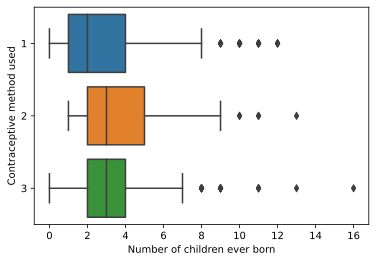

In [ ]:
sns.boxplot(x='Number of children ever born', y="Contraceptive method used", data=data_clas, orient="h")

Тут мы видим всё то же, за исключением выбрасов, что очень важно для нас. То есть основная масса имеет от 1 ребёнка до 5.

In [ ]:
data_clas[data_clas['Number of children ever born']>5]['Number of children ever born'].count()

233

In [ ]:
data_clas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Wife's age                    1473 non-null   int64
 1   Wife's education              1473 non-null   int64
 2   Husband's education           1473 non-null   int64
 3   Number of children ever born  1473 non-null   int64
 4   Wife's religion               1473 non-null   int64
 5   Wife's now working?           1473 non-null   int64
 6   Husband's occupation          1473 non-null   int64
 7   Standard-of-living index      1473 non-null   int64
 8   Media exposure                1473 non-null   int64
 9   Contraceptive method used     1473 non-null   int64
dtypes: int64(10)
memory usage: 115.2 KB


In [ ]:
print(str(233/1473*100)+'%')

15.81805838424983%


In [ ]:
sns.boxplot(x='''Wife's age''', y="Contraceptive method used", data=data_clas, orient="h")

Первый метод охватывает более обширную "целевую аудиторию". По остальному ничего нового сказать нельзя. 

Видим основной возраст (под квадратом), который использует тот или иной метод контрацепции.

In [ ]:
import numpy as np
import seaborn as sns

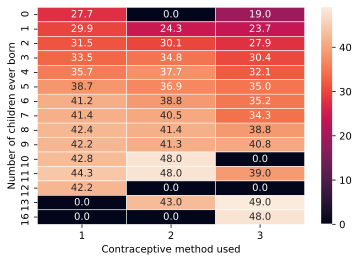

In [ ]:
table = data_clas.pivot_table(
                        index='Number of children ever born', 
                        columns="Contraceptive method used", 
                        values='''Wife's age''', 
                        aggfunc=np.mean).fillna(0).applymap(float)
sns.heatmap(table, annot=True, fmt=".1f", linewidths=.5)

Можно заметить, что самые маленькие средние возраста находятся в верхнем правом углу, а ниже и левее средние возраста увеличиваются.
Тут прослеживается зависимость, молодые-без детей-3 вид, средние-есть дети-1,2,3 вид, старшие-детей больше-2,3 вид. Естественно эта закономерность не чёткая, есть исключения, но "что-то в этом есть".
Но, люди от 40 до 50 